In [12]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import keras
import glob

In [14]:
train_files = glob.glob("E:/Task-3 SnT/chest_xray/train/*/**")

In [15]:
len(train_files)

5216

In [16]:
dict={0 :'normal',1: 'viral pneumonia',2: 'bacterial pneumonia'}

In [17]:
train_files[5200]

'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person993_virus_1671.jpeg'

In [18]:
from random import shuffle
shuffle(train_files)
train_files

['E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1082_virus_1794.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person61_bacteria_289.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person663_bacteria_2555.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1135_bacteria_3077.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person48_bacteria_233.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person556_bacteria_2326.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-0895-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1678_bacteria_4446.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1468_bacteria_3822.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-0622-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person298_virus_618.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PNEUMONIA\\person1642_bacteria_4352.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\NORMAL\\NORMAL2-IM-0462-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/train\\PN

In [19]:
from PIL import Image

In [20]:
pic = Image.open(train_files[5200])

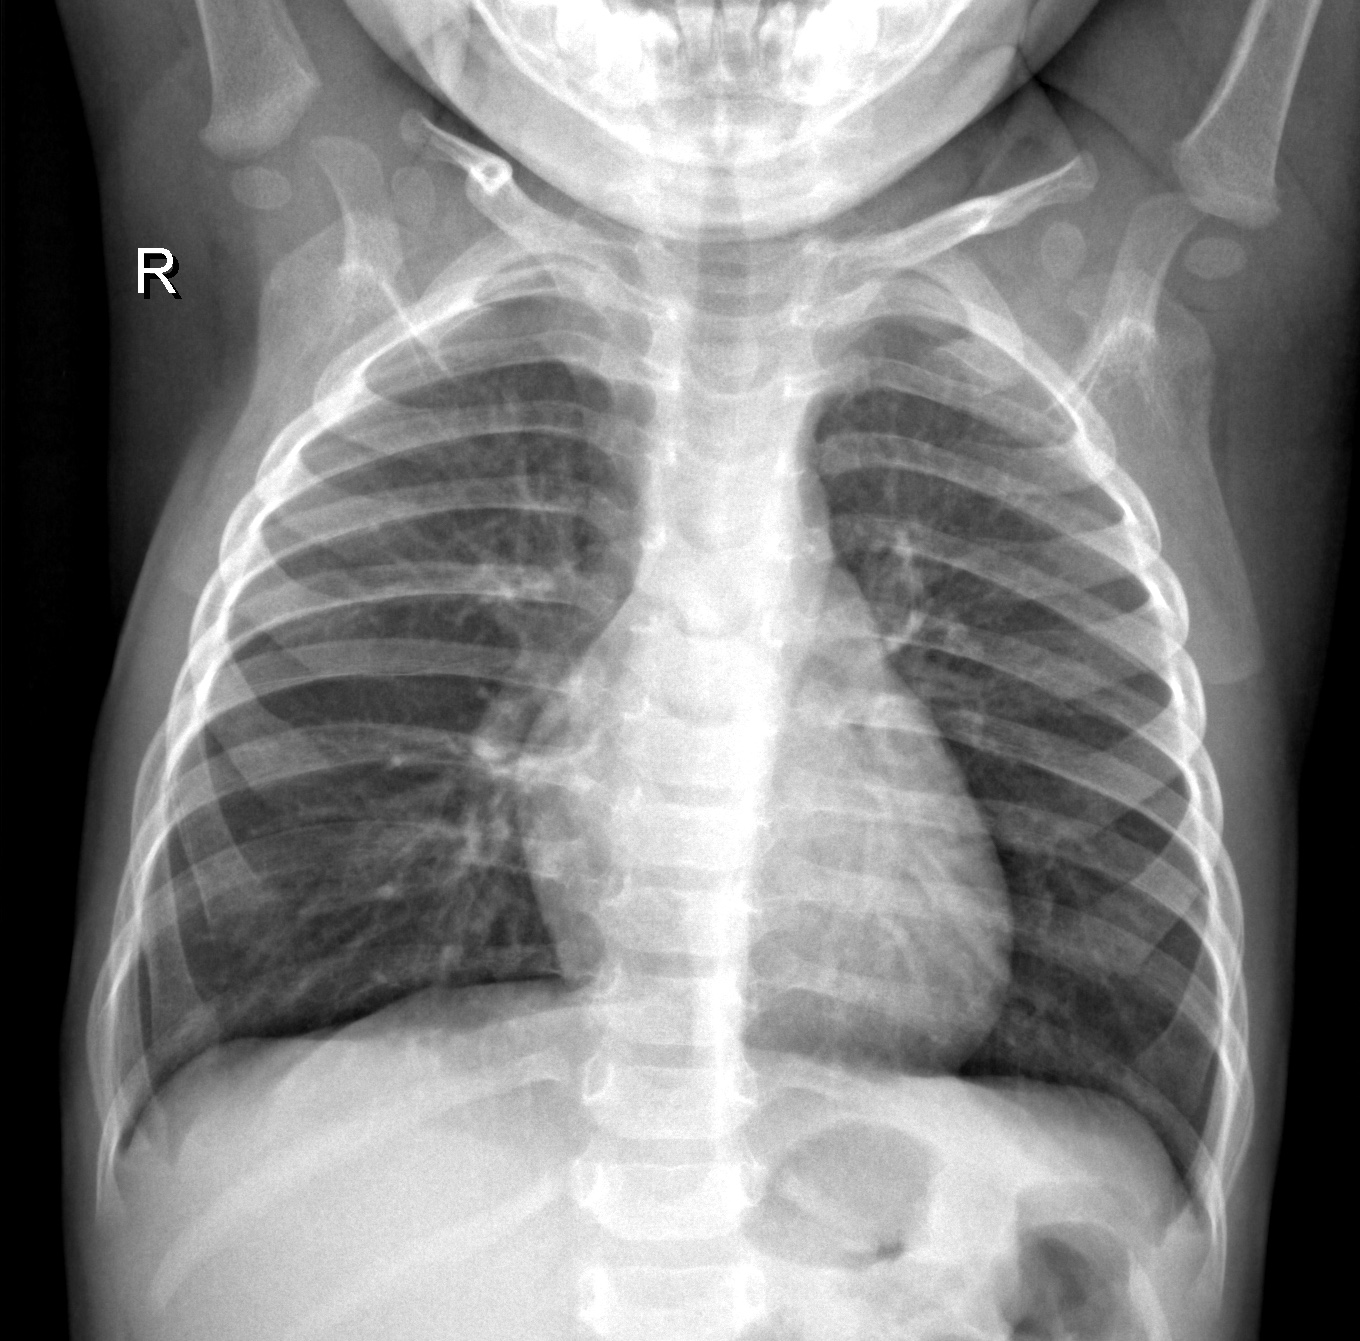

In [21]:
plt.show(pic)
pic

In [22]:
import cv2

In [23]:
pic = cv2.imread(train_files[5200],cv2.IMREAD_GRAYSCALE)

In [24]:
pic.shape

(1341, 1360)

In [25]:
shape=(128,128)

In [26]:
pic1=cv2.resize(pic , shape, interpolation = cv2.INTER_AREA)

In [27]:
pic1.shape

(128, 128)

In [28]:
X_train = np.zeros((len(train_files),128,128))

In [29]:
for i,fi in enumerate(train_files):
    pic = cv2.imread(fi,cv2.IMREAD_GRAYSCALE)
    pic1=cv2.resize(pic , shape, interpolation = cv2.INTER_AREA)
    X_train[i,:,:]=pic1

In [30]:
key1 = '\\'
key2 = '\\'
Y_train = np.zeros((len(train_files),1))

In [31]:
for i,fi in enumerate(train_files):
     label=fi.partition(key1)[2].partition(key2)[0]
     if (label=='NORMAL'):
         val=0
     else:
        if fi.partition('_')[2].partition('_')[2].partition('_')[0]=='virus' :
             val=1
        elif fi.partition('_')[2].partition('_')[2].partition('_')[0]=='bacteria' :
             val=2
     Y_train[i,:]=val

In [32]:
Y_train[226]

array([2.])

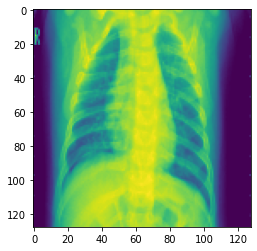

In [33]:
plt.imshow(X_train[0])

In [34]:
X_train[0]

array([[23., 31.,  5., ...,  5.,  9.,  7.],
       [20., 19.,  3., ...,  3.,  7.,  8.],
       [15.,  9.,  2., ...,  2.,  4.,  9.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [35]:
X_train/255.0

array([[[0.09019608, 0.12156863, 0.01960784, ..., 0.01960784,
         0.03529412, 0.02745098],
        [0.07843137, 0.0745098 , 0.01176471, ..., 0.01176471,
         0.02745098, 0.03137255],
        [0.05882353, 0.03529412, 0.00784314, ..., 0.00784314,
         0.01568627, 0.03529412],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.19215686, 0.20392157, 0.21960784, ..., 0.20392157,
         0.19607843, 0.19215686],
        [0.21176471, 0.21960784, 0.23137255, ..., 0.20392157,
         0.19607843, 0.18823529],
        [0.21568627, 0.22352941, 0.23137255, ..., 0.23921569,
         0.2       , 0.18431373],
        ...,
        [0.09411765, 0.09019608, 0.08627451, ..., 0.09411765,
         0.09803922, 0.09803922],
        [0.0

In [36]:
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [37]:
model= keras.Sequential()
model.add(Conv2D(32,(3,3),strides=2,padding='Same',activation='relu',input_shape=(128, 128, 1)))
model.add(MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3)) #here added dropout
model.add(Conv2D(64,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(256,(3,3), strides=1,padding= 'Same', activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(tf.keras.layers.BatchNormalization())
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(512, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(3, activation = "softmax"))
   

In [38]:
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-3),
     loss='sparse_categorical_crossentropy',
     metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0

In [40]:
X_train=X_train.reshape(len(X_train),128,128,1)

In [41]:
X_train.shape

(5216, 128, 128, 1)

In [42]:
model.fit(X_train, Y_train,epochs=2,validation_split=0.1)

Epoch 1/2
147/147 [==============================] - 105s 682ms/step - loss: 1.2221 - accuracy: 0.6800 - val_loss: 0.5995 - val_accuracy: 0.7701
Epoch 2/2
147/147 [==============================] - 96s 652ms/step - loss: 0.5450 - accuracy: 0.7593 - val_loss: 0.4953 - val_accuracy: 0.7739


PREDICTING ON TEST DATA:

In [43]:
test_data = glob.glob("E:/Task-3 SnT/chest_xray/test/*/**")

In [44]:
from random import shuffle
shuffle(test_data)
test_data

['E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0374-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0378-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0361-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\IM-0081-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0310-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person48_virus_100.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\IM-0010-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0319-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person122_bacteria_583.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person1_virus_13.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person43_virus_92.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person32_virus_71.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\NORMAL\\NORMAL2-IM-0098-0001.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person109_bacteria_513.jpeg',
 'E:/Task-3 SnT/chest_xray/test\\PNEUMON

In [67]:
p=cv2.imread(test_data[8],cv2.IMREAD_GRAYSCALE)
p

array([[ 12,  12,  12, ..., 191, 189, 183],
       [ 12,  12,  11, ..., 192, 191, 186],
       [ 12,  11,  11, ..., 191, 190, 187],
       ...,
       [ 17,  17,  17, ...,  16,  22,  27],
       [ 17,  17,  17, ...,  20,  29,  38],
       [ 17,  17,  17, ...,  23,  36,  46]], dtype=uint8)

In [68]:
test_data[8]

'E:/Task-3 SnT/chest_xray/test\\PNEUMONIA\\person122_bacteria_583.jpeg'

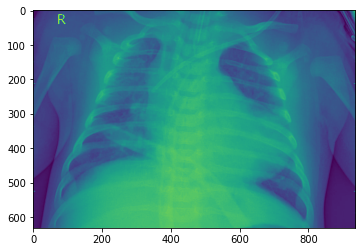

In [69]:
plt.imshow(p)
x_test=cv2.resize(p , shape, interpolation = cv2.INTER_AREA)


In [70]:
x_test/255.0

array([[0.04313725, 0.03921569, 0.09019608, ..., 0.22745098, 0.41568627,
        0.70588235],
       [0.03529412, 0.05098039, 0.11372549, ..., 0.1372549 , 0.38039216,
        0.61960784],
       [0.02745098, 0.0745098 , 0.14117647, ..., 0.08627451, 0.3372549 ,
        0.54509804],
       ...,
       [0.07058824, 0.0627451 , 0.04313725, ..., 0.08627451, 0.08627451,
        0.08627451],
       [0.06666667, 0.0627451 , 0.03921569, ..., 0.08627451, 0.09019608,
        0.08627451],
       [0.06666667, 0.0627451 , 0.03921569, ..., 0.08627451, 0.08235294,
        0.08235294]])

In [75]:
X_test=x_test.reshape(1,128,128,1)

In [76]:
y_test = model.predict(X_test)

In [77]:
for i in y_test:
    y_test = np.argmax(i)
print('Label : ', dict[y_test])

Label :  bacterial pneumonia
